In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df_train = pd.read_csv('sales_train.csv')
df_test = pd.read_csv('test.csv')
df_shops = pd.read_csv('shops.csv')
df_items = pd.read_csv('items.csv')
df_item_cats = pd.read_csv('item_categories.csv')

In [10]:
df_item_cats.head(20)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [12]:
df_items.head(20)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [54]:
df_shops['name_clear']= df_shops['shop_name'].replace('[0-9!"\?\.)(,]', '', regex=True).sort_values()
# for shop in df_shops['name_clear', 'shop_name'].values:
#     print(shop)
df_shops['city'] = df_shops['name_clear'].str.split().str[0]
df_shops[['name_clear', 'shop_name', 'city']]
df_shops['city'].value_counts().sort_index()

Адыгея               1
Балашиха             1
Волжский             1
Вологда              1
Воронеж              3
Выездная             1
Жуковский            2
Интернет-магазин     1
Казань               2
Калуга               1
Коломна              1
Красноярск           2
Курск                1
Москва              13
Мытищи               1
ННовгород            2
Новосибирск          2
Омск                 1
РостовНаДону         3
СПб                  2
Самара               2
Сергиев              1
Сургут               1
Томск                1
Тюмень               3
Уфа                  2
Химки                1
Цифровой             1
Чехов                1
Якутск               4
Ярославль            1
Name: city, dtype: int64

In [5]:
join_shop = pd.merge(df_train, df_shops, on='shop_id')
join_item = pd.merge(join_shop, df_items, on='item_id')
join_item_cat = pd.merge(join_item, df_item_cats, on = 'item_category_id')
join_item_cat

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
...,...,...,...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,13093,250.0,1.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 250 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра)
2935845,21.09.2015,32,55,13091,1000.0,1.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2935846,16.09.2015,32,55,13094,2500.0,1.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2935847,22.09.2015,32,55,13094,2500.0,2.0,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)


In [6]:
rand_ids = list(df_train.sample(9)['item_id'])
join_item_cat['item_total'] = join_item_cat['item_price'] * join_item_cat['item_cnt_day']
grp = join_item_cat[join_item_cat['item_id'].isin(rand_ids)].groupby(['item_id', 'item_name', 'date_block_num'])
item_total = grp['item_cnt_day'].sum()
item_total

item_id  item_name                                     date_block_num
486      1С:Бухгалтерия 8. Учебная версия. Издание 8.  20                 66.0
                                                       21                183.0
                                                       22                170.0
                                                       23                108.0
                                                       24                149.0
                                                                         ...  
18550    СВАТЫ 5 (9-16 СЕРИИ) (регион)                 17                  3.0
18974    СОЛНЕЧНЫЙ УДАР                                23                201.0
                                                       24                203.0
                                                       25                 65.0
                                                       26                  4.0
Name: item_cnt_day, Length: 163, dtype: float64

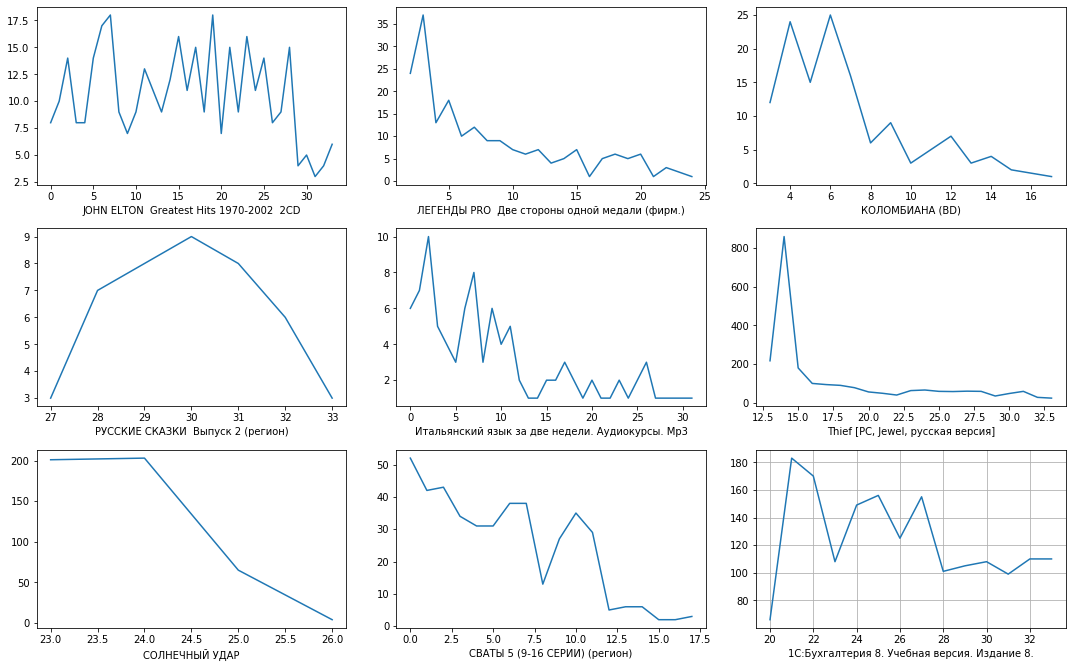

In [7]:
fig = plt.figure(figsize = (15,12))
ax = fig.gca()
for n in np.arange(1, len(rand_ids)+1):

#     ax.set_xticks(numpy.arange(0, item_total.shape[0], 1))
# ax.set_yticks(numpy.arange(0, 1., 0.1))
# plt.scatter(range(item_total.shape[0]), grp['item_price'].median())
    item_id = rand_ids[n-1]
    curr = item_total.xs(item_id, level='item_id', drop_level=False)
# list(curr.index.unique(level='date_block_num'))
# curr
    plt.subplot(430 + n)
    plt.plot(list(curr.index.unique(level='date_block_num')), curr)
    plt.xlabel(curr.index.unique(level='item_name').values[0])
# plt.grid()
# # plt.grid(True)
# plt.subplot(222)
# plt.plot(range(item_total.shape[0]), grp['item_cnt_day'].mean())
# plt.grid()
# plt.subplot(223)
# plt.plot(range(item_total.shape[0]), grp['item_total'].sum())

plt.grid()

plt.tight_layout()

In [3]:
join_item = pd.merge(df_train, df_items, on='item_id')
join_item['date'] = pd.to_datetime(join_item['date'], format='%d.%m.%Y')
join_item['date'].describe()

count                 2935849
unique                   1034
top       2013-12-28 00:00:00
freq                     9434
first     2013-01-01 00:00:00
last      2015-10-31 00:00:00
Name: date, dtype: object

[(11, 3675) (45, 13525) (48, 7655) (26, 18532) (21, 17807) (44, 13820)
 (7, 9960) (51, 11021) (51, 6499)]


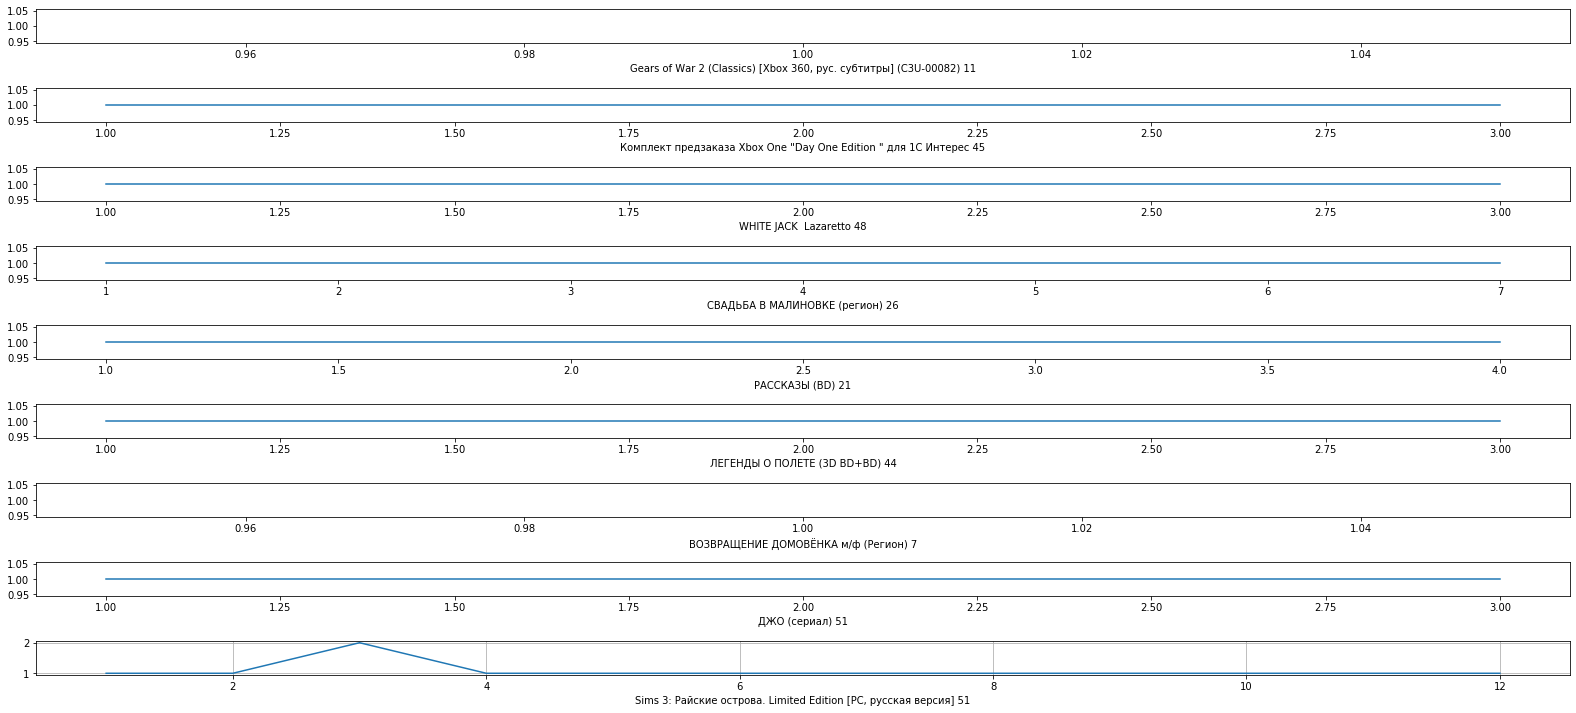

In [4]:
rand_shop_item = join_item.groupby(['shop_id', 'item_id'])['item_cnt_day'].mean().sample(9).index.values
print(rand_shop_item)
# rand_shop_item = pd.DataFrame({'shop_id' : [i[0] for i in rand_shop_item], 

#                                'item_id': [i[1] for i in rand_shop_item]})

fig = plt.figure(figsize = (22,10))
ax = fig.gca()
n=1
for shop_id, item_id in rand_shop_item:
#     item_id = rand_ids[n-1]
#     curr = item_total.xs(item_id, level='item_id', drop_level=False)
    
    data = join_item[np.logical_and(join_item['shop_id'] == shop_id, join_item['item_id'] == item_id)]\
    .sort_values(by='date')[['item_cnt_day', 'item_name']]
    

    plt.subplot(910 + n)
    plt.plot(range(1, data.shape[0]+1), data['item_cnt_day'])
    
  
    
    plt.xlabel(data['item_name'].values[0]+ " " + str(shop_id))
    n = n+1
    

plt.grid()
plt.tight_layout()

In [60]:
join_item[np.logical_and(join_item['shop_id'] == 5, join_item['item_id'] == 6357)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
1507687,2013-12-27,11,5,6357,299.0,1.0,STRATOVARIUS Nemesis,55


[(11, 3675) (45, 13525) (48, 7655) (26, 18532) (21, 17807) (44, 13820)
 (7, 9960) (51, 11021) (51, 6499)]
(853, 2)
(766, 2)
(389, 2)
(362, 2)


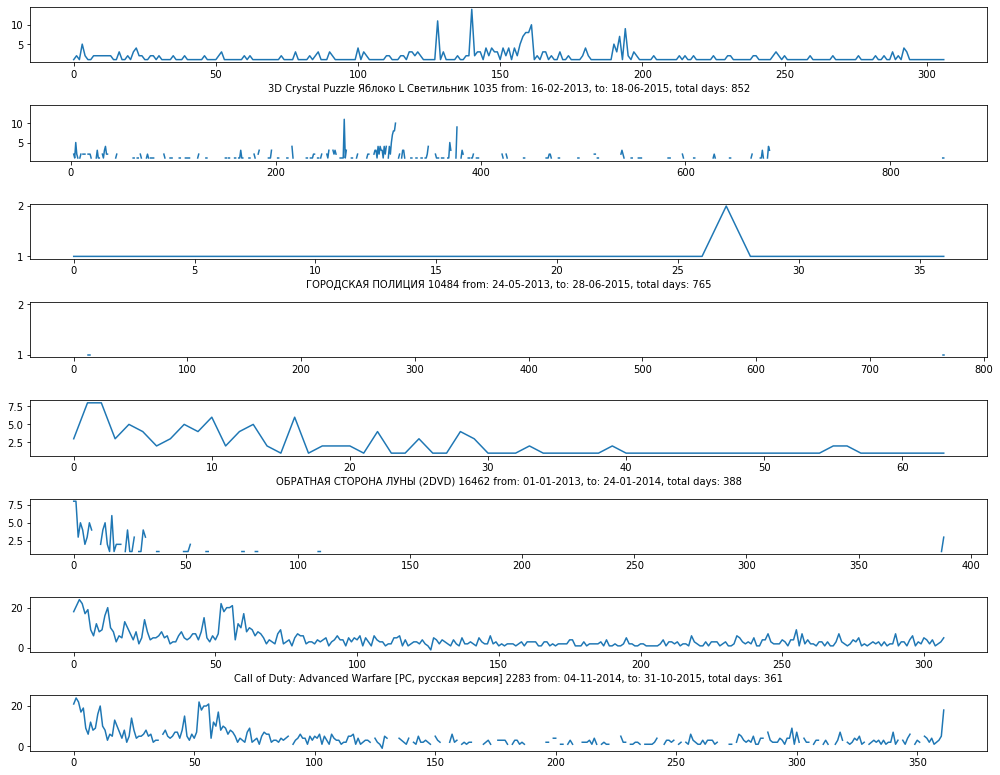

In [9]:
rand_item = join_item.groupby(['item_id'])['item_cnt_day'].mean().sample(4).index.values
print(rand_shop_item)
# rand_shop_item = pd.DataFrame({'shop_id' : [i[0] for i in rand_shop_item], 

#                                'item_id': [i[1] for i in rand_shop_item]})

fig = plt.figure(figsize = (14,12))
ax = fig.gca()
n=1
for  item_id in rand_item:
#     item_id = rand_ids[n-1]
#     curr = item_total.xs(item_id, level='item_id', drop_level=False)
    
    data = join_item[join_item['item_id'] == item_id].sort_values(by='date')\
    .groupby(['item_id', 'item_name', 'date'])['item_cnt_day'].sum()
    
    _from = data.index.unique(level='date').min()
    _to = data.index.unique(level='date').max()
    _total = _to - _from 
    
   
    
    plt.subplot(910 + n)
    plt.plot(range(data.shape[0]), data)
    plt.xlabel(data.index.unique(level='item_name').values[0]
               + " " + str(item_id) + " from: " + _from.strftime('%d-%m-%Y') + ", to: " + _to.strftime('%d-%m-%Y')
              + ", total days: " + str(_total.days))
    n = n+1
    
    right = pd.DataFrame({'date' : reversed([_to - datetime.timedelta(days=x) for x in range(_total.days)])})
    join = pd.merge(right, data, right_index=True, on='date',how = 'outer')
    
    plt.subplot(910 + n)
    plt.plot(range(join.shape[0]), join.iloc[:,1])
    
    print(join.shape)
    n = n+1


plt.tight_layout()